<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing Where Do People Drink?

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Be confident about your data analysis skills


This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.


You will need the following libraries:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



<b>Importing the Data</b>


Load the csv:


In [37]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
df.rename(columns={'beer_servings': 'beer','spirit_servings':'spirits','wine_servings':'wine','total_litres_of_pure_alcohol':'litres'}, inplace=True)

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:


In [38]:
df.head()

,country,beer,spirits,wine,litres,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.


In [39]:
df.dtypes

country       object
beer           int64
spirits        int64
wine           int64
litres       float64
continent     object
dtype: object

<b>Question 2</b> Use the method <code>groupby</code> to get the number of wine servings per continent:


In [40]:
df_test = df[['continent','wine']]
df_wine = df_test.groupby(['continent'], as_index = False).sum()
df_wine

,continent,wine
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:


In [41]:
df_beer = df[['country','continent', 'beer']]
df_beer.groupby('continent').describe()

beer                                                           
              count        mean        std   min     25%    50%     75%    max
continent                                                                     
Africa         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0
Asia           44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0
Europe         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0
North America  23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0
Oceania        16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0
South America  12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0

<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.


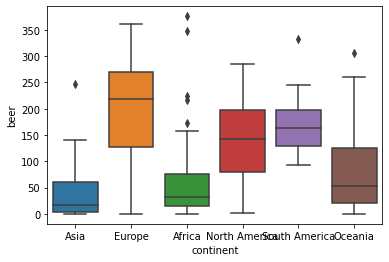

In [42]:
import seaborn as sns
ax = sns.boxplot(x = 'continent', y = 'beer', data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.


(0.0, 408.16268286928926)

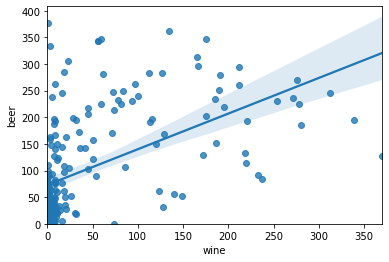

In [43]:
import seaborn as sns 
wine_correlation = sns.regplot(x='wine',y='beer', data= df)
plt.ylim(0,)

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['wine']]
y = df[['litres']]
lm.fit(x,y)
lm.score(x,y)

0.4456875459787605

<br>
<b>Note:</b> Please use <code>test_size = 0.10</code> and <code>random_state = 0</code> in the following questions.


<b>Question 7: </b>Use list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_data = df[['litres']]
x_data = df.drop('litres',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.10, random_state = 0)
print('Number of test samples :', x_test.shape[0])
print('Number of training samples :', x_train.shape[0])

lre = LinearRegression()
lre.fit(x_train[['wine','beer','spirits']],y_train)
print(lre.score(x_test[['wine','beer','spirits']],y_test))


Number of test samples : 20
Number of training samples : 173
0.6990304512837944


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:


<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
y_data = df[['litres']]
x_data = df.drop('litres',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.10, random_state = 0)

pr = PolynomialFeatures(degree = 4, include_bias =False)
x_train_pr = pr.fit_transform(x_train[['wine','beer','spirits']])
x_test_pr = pr.fit_transform(x_test[['wine','beer','spirits']])
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
poly.score(x_test_pr,y_test)


0.7346078290923717

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$


In [126]:
from sklearn.linear_model import Ridge
pr = PolynomialFeatures(degree = 4, include_bias =False)
x_train_pr = pr.fit_transform(x_train[['wine','beer','spirits']])
x_test_pr = pr.fit_transform(x_test[['wine','beer','spirits']])


RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_pr,y_train)
RidgeModel.score(x_test_pr,y_test)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.47726e-19): result may not be accurate.
  overwrite_a=True).T


0.7346071723504599

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 


In [128]:
pr = PolynomialFeatures(degree=2, include_bias = False)
x_train_pr2 = pr.fit_transform(x_train[['wine','beer','spirits']])
x_test_pr2 = pr.fit_transform(x_test[['wine','beer','spirits']])

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr2,y_train)
RidgeModel.score(x_test_pr2, y_test)

0.7076376228095798

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook


<b>Sources</b>


<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
